In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne import Epochs, pick_types, annotations_from_events, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP, SPoC
from mne.viz import plot_events, plot_montage
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, corrmap, Xdawn



In [6]:
tmin, tmax = -1.0, 4.0
subject = 1
experiment = {
    "runs": [3, 7, 11],
    "mapping": {0: "rest", 1: "left fist", 2: "right fist"},
}
event_id = dict(T0=0, T1=1, T2=2)
drop_channels = False

In [10]:
raw_fnames = [f"data/S{subject:03d}/S{subject:03d}R{run:02d}.edf" for run in experiment["runs"]]


In [11]:
raw_fnames

['data/S001/S001R03.edf', 'data/S001/S001R07.edf', 'data/S001/S001R11.edf']

In [21]:
raw = read_raw_edf(raw_fnames[0], preload=True)

Extracting EDF parameters from /goinfre/mbocquel/total-perspective-vortex/data/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


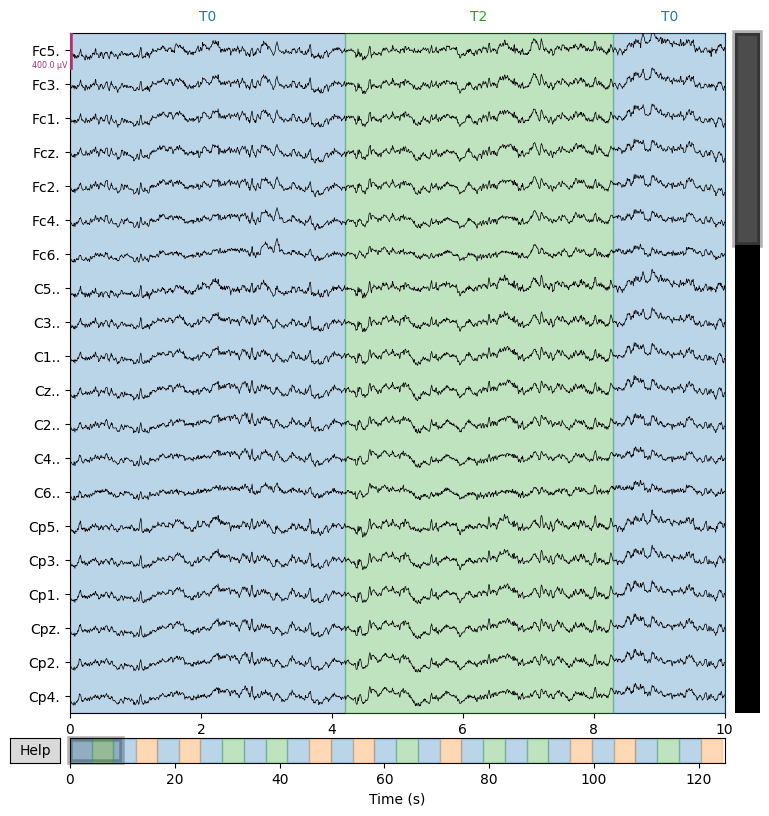

In [25]:
raw.plot(scalings=dict(eeg=200e-6))
plt.show()
